# Charting the Path to Sustainability: Integrating Land Sector Data with SDGs

## Task 1 - Land Sector Management and Exploratory Data Analysis (EDA)
### CASE STUDY: NIGERIA

**BRIEF INTRODUCTION OF NIGERIA**

Nigeria, located in West Africa, is the most populous country on the continent and one of the most ethnically diverse in the world. Home to over 200 million people, Nigeria boasts a rich assortment of cultures, languages, and traditions. Its landscape includes bustling cities like Lagos and the natural beauty of savannas, rainforests, and abundant wildlife. It is a major player in Africa's economy, driven by industries like oil and agriculture, but it grapples with challenges such as political instability and economic inequality.

The country shares its borders with several neighboring countries, including Benin, Niger, Chad, and Cameroon. Each of these countries contributes to the geographical and climatic diversity of the region. Benin, to the west, shares similarities in climate and vegetation with Nigeria, while Niger, in the north, experiences a Sahelian climate with hot and dry conditions. Chad, to the northeast, has a similar climate, particularly in the Lake Chad Basin. Cameroon, to the east, exhibits rich biodiversity and varied climatic conditions, with a border running from the Atlantic coast to the Lake Chad region.

Nigeria's climate is as diverse as its landscape. The country features tropical wet conditions in the south, a transitional savannah climate in the central "Middle Belt," and a Sahelian climate in the arid north. These climate variations are closely tied to Nigeria's agro-ecological zones, which influence agricultural practices. The forest zone in the south is ideal for tree crops like oil palm and cocoa, the savannah zone supports cereals such as maize and yam, the Sahelian zone is suited for drought-resistant crops like sorghum and pearl millet, and higher elevation areas, like the Jos Plateau, allow for cool-weather crops such as potatoes. Nigeria's diverse climate and agro-ecological zones offer a range of opportunities for agriculture and play a crucial role in shaping the country's agricultural landscape and food security. The nation's history is a complex blend of indigenous heritage, colonial legacy, and a continual quest for progress.

Below is an exploratory analysis of the data found in Moja Global datasets pertaining to Nigeria, particularly administrative, bioclimatic, ecological, soil and biodiversity.


**Import Libraries**

In [1]:
# import libraries
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import json
%matplotlib inline

## ADMINISTRATIVE

**Boundaries**

In [2]:
#Load administrative boundaries of Nigeria
nga_admin_boundaries = '/home/x/Documents/Moja/NGA_AL2_Nigeria.json'

#Read the geospatial boundary data into a GeoDataFrame
nga_boundaries = gpd.read_file(nga_admin_boundaries)
nga_boundaries.shape

(1, 12)

In [3]:
nga_boundaries.head(2)

,country,ISO3166_2,name,enname,locname,offname,boundary,adminlevel,wikidata,wikimedia,timestamp,geometry
0,NGA,,Nigeria,Nigeria,Nigeria,,administrative,2,Q1033,en:Nigeria,2019-09-18 23:02:02,"MULTIPOLYGON (((6.44714 4.30935, 6.44678 4.309..."


In [4]:
#Load the administrative boundaries dataset for all states in Nigeria
nga_states_admin = '/home/x/Documents/Moja/NGA_ALL_states.json'

#Read the states' geospatial boundary data into a GeoDataFrame
nga_states_boundaries = gpd.read_file(nga_states_admin)
nga_states_boundaries.head(2)

,country,ISO3166_2,name,enname,locname,offname,boundary,adminlevel,wikidata,wikimedia,timestamp,geometry
0,NGA,NG-AB,Abia,,Abia,,administrative,4,Q320852,en:Abia State,2019-09-18 23:02:02,"POLYGON ((7.14043 4.90063, 7.14375 4.89561, 7...."
1,NGA,NG-AD,Adamawa,,Adamawa,,administrative,4,Q337514,en:Adamawa State,2019-02-26 10:52:47,"POLYGON ((11.34152 8.01867, 11.34614 8.01523, ..."


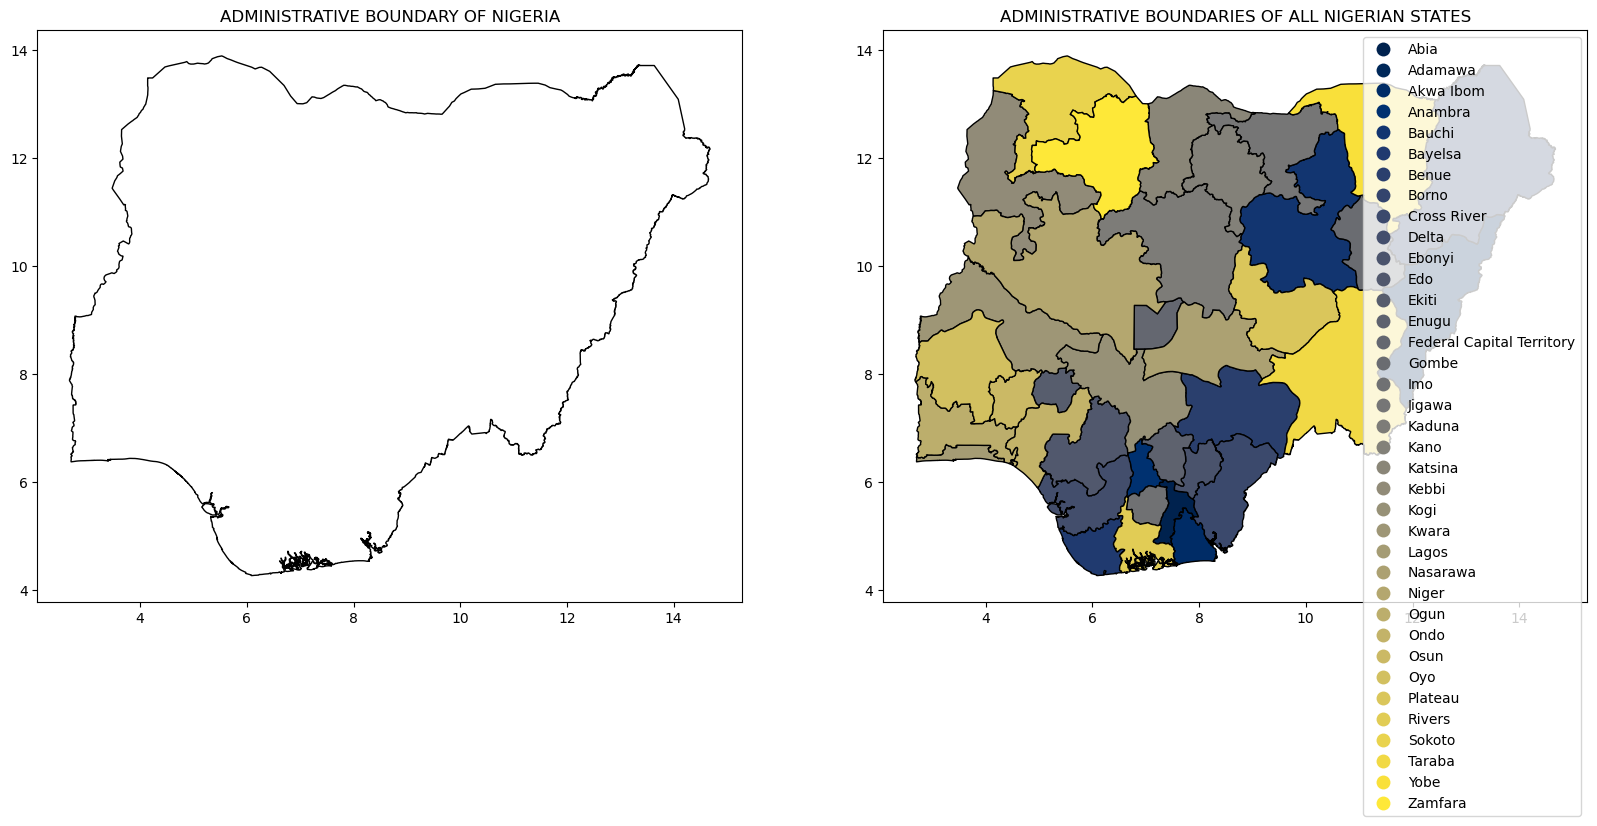

In [5]:
#Plot administrative boundaries
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

nga_boundaries.plot(ax=ax1, color='white', edgecolor = 'black')
nga_states_boundaries.plot(ax=ax2, column='name', cmap='cividis', edgecolor = 'black', legend=True)

ax1.set_title('ADMINISTRATIVE BOUNDARY OF NIGERIA')
ax2.set_title('ADMINISTRATIVE BOUNDARIES OF ALL NIGERIAN STATES')

plt.show()

**Roads**

In [6]:
#Load global roads open access dataset
roads_data = '/home/x/Documents/Moja/Global Roads Open Access Data Set_dissolved.json'

#Read the road data into a GeoDataFrame
global_roads = gpd.read_file(roads_data)
global_roads.head(2)

,OBJECTID,ONME,FCLASS,SRFTPE,ISSEASONAL,CURNTPRAC,GDWTHRPRAC,SUM_LENGTH_KM,geometry
0,1,None,0,0.0,0.0,NaN,NaN,16686.65607,"LINESTRING (-66.82451 17.98029, -66.82455 17.9..."
1,2,None,0,0.0,0.0,NaN,NaN,16686.65607,"LINESTRING (-66.62012 17.98131, -66.62126 17.9..."


In [7]:
global_roads.shape

(1101300, 9)

In [8]:
# Perform a spatial join to select roads within Nigeria
nga_roads = gpd.sjoin(global_roads, nga_boundaries, how='inner', predicate='intersects')

# Reset indexes of the GeoDataFrame
nga_roads.reset_index(drop=True, inplace=True)

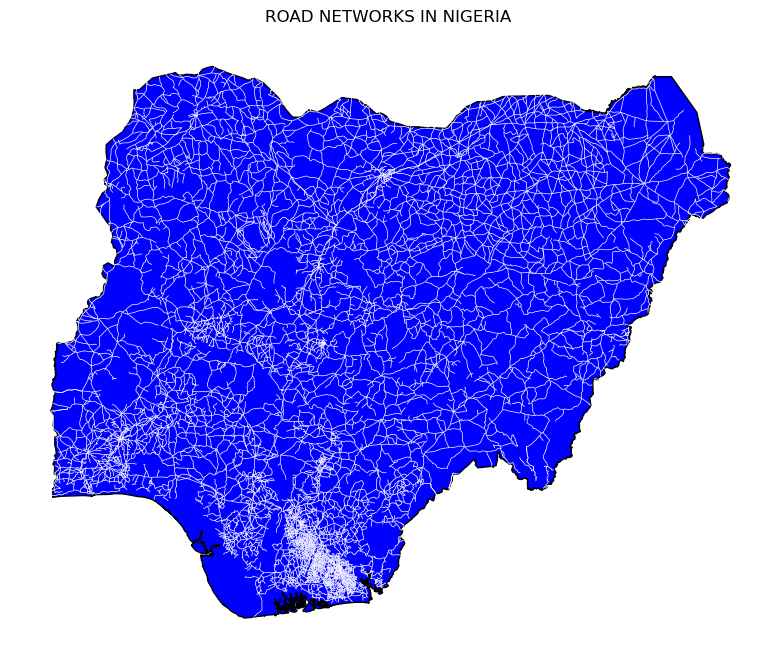

In [9]:
#Plot administrative boundary and road network of Nigeria
fig, ax = plt.subplots(figsize=(12, 8))

nga_boundaries.plot(ax=ax, color='blue', edgecolor = 'black')
nga_roads.plot(ax=ax, color='white', linewidth=0.5)

plt.title('ROAD NETWORKS IN NIGERIA')
plt.axis('off')
plt.show()

**Protected Areas**

In [10]:
#Load world database of protected areas dataset and create a GeoDataFrame
wdpa = '/home/x/Documents/Moja/WDPA_WDOECM_wdpa_gdb_polygons/WDPA_WDOECM_wdpa_gdb_polygons.shx'
protected_areas = gpd.read_file(wdpa)
protected_areas.head(2)

,WDPAID,WDPA_PID,PA_DEF,NAME,ORIG_NAME,DESIG,DESIG_ENG,DESIG_TYPE,IUCN_CAT,INT_CRIT,...,MANG_AUTH,MANG_PLAN,VERIF,METADATAID,SUB_LOC,PARENT_ISO,ISO3,SUPP_INFO,CONS_OBJ,geometry
0,10715.0,10715,1,Kronotskiy,Kronotskiy,UNESCO-MAB Biosphere Reserve,UNESCO-MAB Biosphere Reserve,International,Not Applicable,Not Applicable,...,Not Reported,Not Reported,State Verified,840,RU-KAM,RUS,RUS,Not Applicable,Not Applicable,"MULTIPOLYGON (((160.49655 55.17709, 160.49907 ..."
1,209777.0,209777_E,1,Sarali Land between Rivers / Great Volzhsko-Ka...,Great Volzhsko-Kamsky,UNESCO-MAB Biosphere Reserve,UNESCO-MAB Biosphere Reserve,International,Not Applicable,Not Applicable,...,Not Reported,Not Reported,State Verified,840,RU-TA,RUS,RUS,Not Applicable,Not Applicable,"POLYGON ((49.30487 55.36806, 49.30433 55.37184..."


In [11]:
protected_areas.shape

(240165, 31)

In [12]:
protected_areas['PARENT_ISO'].unique()

array(['RUS', 'NZL', 'GBR', 'ECU', 'PHL', 'BLR', 'BRA', 'BHS', 'FIN',
       'FJI', 'BGR', 'BOL', 'BRN', 'DOM', 'BWA', 'CAN', 'NLD', 'DMA',
       'AGO', 'AND', 'ARM', 'EST', 'CAN;USA', 'CZE', 'AUT', 'BEN', 'EGY',
       'ABNJ', 'BIH', 'ALB', 'BEL', 'BGD', 'ESP', 'BLR;POL', 'DEU', 'BRB',
       'BTN', 'CHE', 'CHE;ITA', 'CIV', 'CPV', 'CIV;GIN', 'COM', 'CRI',
       'CRI;PAN', 'DJI', 'CYP', 'DNK', 'HUN', 'IRL', 'JPN', 'ERI',
       'FIN;SWE', 'GIN', 'IRN', 'GRC', 'ITA', 'FRA', 'FRA;ESP', 'GHA',
       'CHN', 'JAM', 'HRV', 'IND', 'HND', 'IRQ', 'ISL', 'ISR', 'NGA',
       'KGZ', 'NAM', 'LKA', 'KEN', 'LCA', 'MWI', 'KAZ', 'LBN', 'LBR',
       'LIE', 'LTU', 'LVA', 'MHL', 'MNG', 'MUS', 'MKD', 'MMR', 'MRT',
       'MNE', 'MNG;RUS', 'NPL', 'AUS', 'THA', 'NOR', 'OMN', 'PAK', 'PAN',
       'PER', 'SWE', 'POL', 'SEN', 'PSE', 'PRT', 'SLE', 'SAU', 'ROU',
       'SDN', 'SGP', 'SSD', 'UGA', 'SUR', 'SVK', 'SVK;HUN', 'SVN', 'TUN',
       'IDN', 'TWN', 'TJK', 'TTO', 'TKM', 'TUR', 'UKR', 'ARG', 'VCT',
    

In [13]:
# Filter for protected areas within Nigeria
nga_protected_areas = protected_areas[protected_areas['PARENT_ISO'] == "NGA"]

nga_protected_areas.shape

(969, 31)

In [14]:
nga_protected_areas.head(2)

,WDPAID,WDPA_PID,PA_DEF,NAME,ORIG_NAME,DESIG,DESIG_ENG,DESIG_TYPE,IUCN_CAT,INT_CRIT,...,MANG_AUTH,MANG_PLAN,VERIF,METADATAID,SUB_LOC,PARENT_ISO,ISO3,SUPP_INFO,CONS_OBJ,geometry
10439,37007.0,37007,1,Umuokpara Umuowa Ogee,Umuokpara Umuowa Ogee,Forest Reserve,Forest Reserve,National,Not Reported,Not Applicable,...,Not Reported,Not Reported,State Verified,213,NG-IM,NGA,NGA,Not Applicable,Not Applicable,"POLYGON ((7.34857 5.77346, 7.34403 5.77314, 7...."
11577,36171.0,36171,1,Zauna,Zauna,Forest Reserve,Forest Reserve,National,Not Reported,Not Applicable,...,Not Reported,Not Reported,State Verified,213,NG-SO,NGA,NGA,Not Applicable,Not Applicable,"POLYGON ((5.15470 13.57931, 5.15718 13.58588, ..."


In [15]:
# Check for unique values and counts in the designated column
nga_protected_areas['DESIG'].value_counts()

DESIG
Forest Reserve                                      925
Game Reserve                                         23
Ramsar Site, Wetland of International Importance      9
National Park                                         8
Wildlife Sanctuary                                    2
Strict Nature Reserve                                 1
Community Forest                                      1
Name: count, dtype: int64

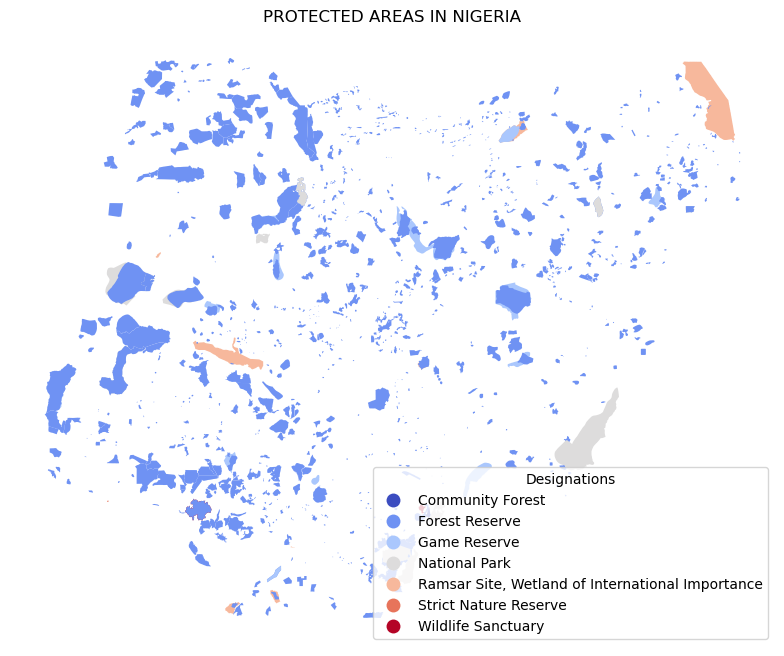

In [16]:
# Create a plot of Nigeria's protected areas
fig, ax = plt.subplots(figsize=(12, 8))

nga_protected_areas.plot(column='DESIG', ax=ax, cmap='coolwarm', legend=True, legend_kwds={'title': 'Designations', 'loc': 'lower right'})

plt.title('PROTECTED AREAS IN NIGERIA')
plt.axis('off')
plt.show()

## BIOCLIMATIC AND ECOLOGICAL ZONES

**Ecological Zones**

In [17]:
#Load ecological zones data set and create a GeoDataFrame
eco_zones = '/home/x/Documents/Moja/NGA_AL2_Nigeria_GEZ.json'
nga_eco_zones = gpd.read_file(eco_zones)
nga_eco_zones.head(2)

,country,ISO3166_2,name,gez_name,gez_code,gez_abbrev,adminlevel,geometry
0,NGA,,Nigeria,Tropical dry forest,13,TAwb,2,"POLYGON ((4.17387 12.70964, 3.91224 12.72630, ..."
1,NGA,,Nigeria,Tropical moist forest,12,TAwa,2,"POLYGON ((6.12077 12.05414, 6.01167 12.05684, ..."


In [18]:
#Print unique ecological zones
nga_eco_zones['gez_name'].value_counts()

gez_name
Tropical dry forest         1
Tropical moist forest       1
Tropical mountain system    1
Tropical rainforest         1
Tropical shrubland          1
Water                       1
Name: count, dtype: int64

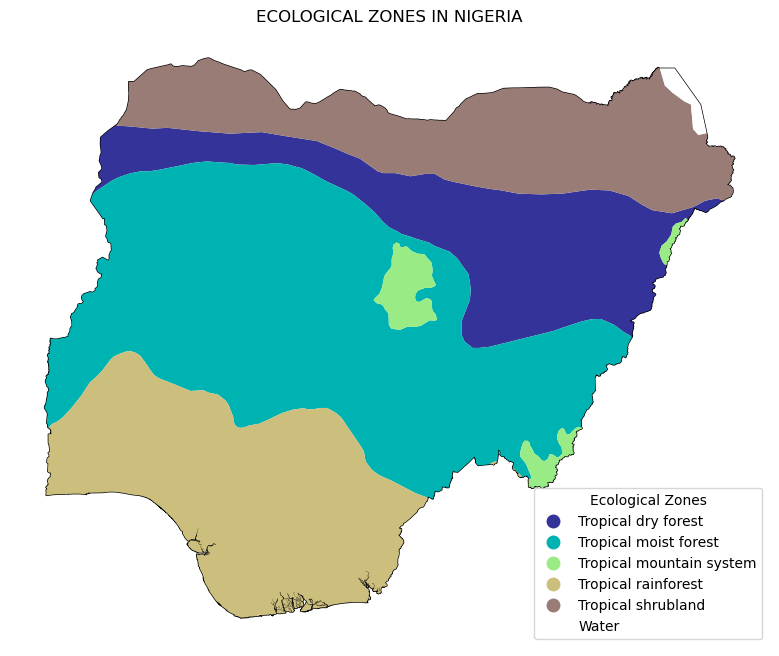

In [19]:
#Plot the ecological zones
fig, ax = plt.subplots(figsize=(12,8))

nga_boundaries.plot(ax=ax, color='white', edgecolor = 'black')
nga_eco_zones.plot(column='gez_name', ax=ax, cmap='terrain', legend=True, legend_kwds={'title': 'Ecological Zones', 'loc': 'lower right'})

plt.title("ECOLOGICAL ZONES IN NIGERIA")
plt.axis('off')
plt.show()

**Biodiversity**

In [20]:
#Load dataset of global biodiversity hotspots and create a GeoDataFrame
biodiversity = '/home/x/Documents/Moja/CI_BiodiversityHotspots.geojson'
global_biodiversity = gpd.read_file(biodiversity)
global_biodiversity.shape

(53, 6)

In [21]:
global_biodiversity.head(2)

,OBJECTID,NAME,Type,Shape_Length,Shape_Area,geometry
0,1,Chilean Winter Rainfall and Valdivian Forests,hotspot area,200.706891,40.754665,"MULTIPOLYGON (((-74.59792 -46.92502, -74.61111..."
1,2,Chilean Winter Rainfall and Valdivian Forests,outer limit,191.174978,186.085694,"POLYGON ((-70.30946 -22.96028, -70.48596 -22.7..."


In [22]:
#Filter for Nigeria's biodiversity hotspots
nga_biodiversity_hotspots = global_biodiversity.clip(nga_boundaries)

In [23]:
nga_biodiversity_hotspots.shape

(1, 6)

In [24]:
nga_biodiversity_hotspots.reset_index(drop=True, inplace=True)
nga_biodiversity_hotspots.head()

,OBJECTID,NAME,Type,Shape_Length,Shape_Area,geometry
0,41,Guinean Forests of West Africa,hotspot area,133.08195,50.52551,"MULTIPOLYGON (((10.76048 7.37974, 10.74016 7.3..."


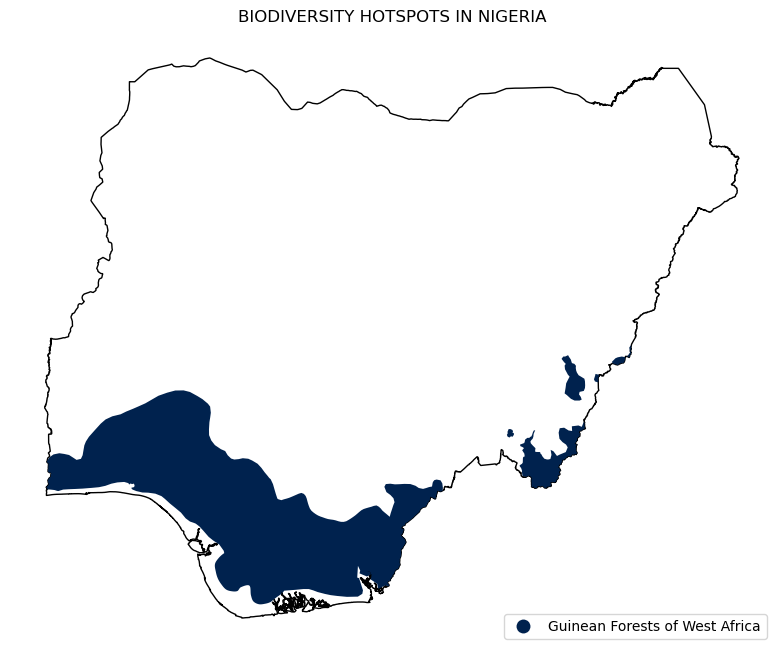

In [25]:
#Plot Nigeria's biodiversity data
fig, ax = plt.subplots(figsize=(12, 8))

nga_boundaries.plot(ax=ax, color='white', edgecolor = 'black')
nga_biodiversity_hotspots.plot(column='NAME', ax=ax, cmap='cividis', legend=True, legend_kwds={'loc': 'lower right'})
plt.title('BIODIVERSITY HOTSPOTS IN NIGERIA')
plt.axis('off')
plt.show()

## SOIL

In [26]:
#Load soil resources dataset and create a GeoDataFrame
nga_soil = '/home/x/Documents/Moja/NGA_AL2_Nigeria_WSR.json'
nga_soil_gdf = gpd.read_file(nga_soil)
nga_soil_gdf.shape

(7, 8)

In [27]:
nga_soil_gdf.head(2)

,country,ISO3166_2,name,SNAME,mg_code,IPCC,adminlevel,geometry
0,NGA,,Nigeria,AC,23,Acrisol,2,"MULTIPOLYGON (((11.51913 6.61454, 11.51960 6.6..."
1,NGA,,Nigeria,AR,3,Arenosol,2,"POLYGON ((5.83178 13.76125, 5.78032 13.78030, ..."


In [28]:
#Check for unique soil resource values
nga_soil_gdf['IPCC'].unique()

array(['Acrisol', 'Arenosol', 'Fluvisol', 'Gleysol', 'Lixisol',
       'Vertisol', 'Waterbodies'], dtype=object)

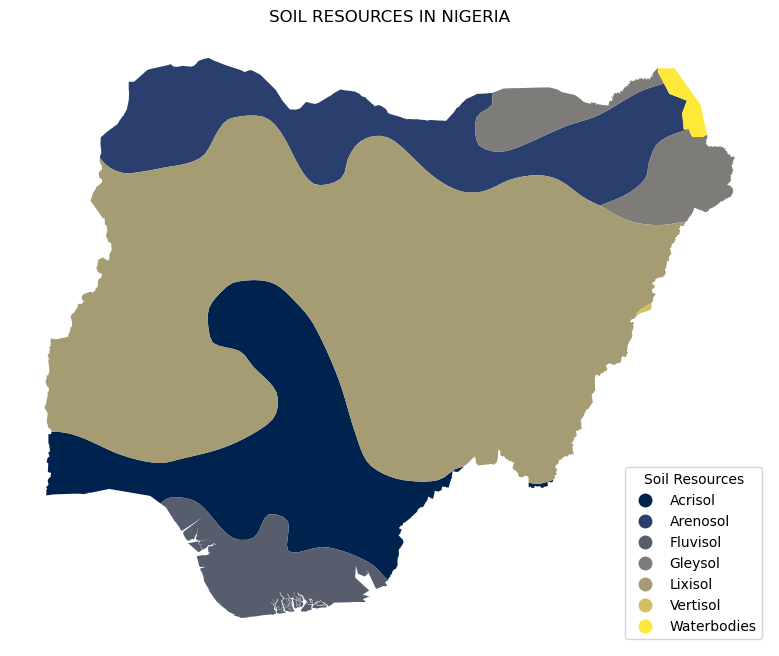

In [29]:
#Create a plot of Nigeria's soil resources
fig, ax = plt.subplots(figsize=(12, 8))

nga_soil_gdf.plot(column='IPCC', ax=ax, cmap='cividis', legend=True, legend_kwds={'title': 'Soil Resources', 'loc': 'lower right'})

plt.title("SOIL RESOURCES IN NIGERIA")
plt.axis('off')
plt.show()